In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings("ignore")

In [9]:
data = pd.read_csv('../datasets/Advertising Budget and Sales.csv')

data = data.rename(columns={
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales',
    })
data = data.drop(columns=['Unnamed: 0'])

In [10]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, shuffle=True, random_state=100)


lr = LinearRegression().fit(X_train, y_train)

coeff_1 = lr.coef_
intercept_1 = lr.intercept_

print('coefficients of TV, Radio, and Newspaper:', coeff_1)
print('y intercept: ',intercept_1)

coefficients of TV, Radio, and Newspaper: [0.0454256  0.18975773 0.00460308]
y intercept:  2.652789668879496


# StandardScaler
is a method used in machine learning for feature scaling.\
It transforms data to have a mean of 0 and a standard deviation of 1, also known as z-score normalization.\
This process ensures that all features have a similar scale,
which can be crucial for algorithms sensitive to feature ranges,\
like those using distance calculations or gradient-based optimization.

### How it works:
* Subtracts the mean:\
For each feature, the mean of the training data is subtracted from each data point.\

* Divides by the standard deviation:\
The result is then divided by the standard deviation of the training data for that feature.\

* Formula:
The transformation can be represented by the formula: z = (x - u) / s, where x is the original data point, u is the mean, and s is the standard deviation. 

* Why use it?
    * Algorithm Performance:
Many machine learning algorithms (e.g., SVMs, neural networks, k-means) perform better when features are on a similar scale.
    * Outlier Sensitivity:
While StandardScaler can be affected by outliers (as it uses mean and standard deviation), it's generally a good starting point for feature scaling.
    * Interpretability:
StandardScaler is relatively straightforward to understand and implement, making it a popular choice.

* When to use:
    * When features have different ranges and distributions. 
    * When using algorithms sensitive to feature scales (e.g., algorithms using distance metrics or gradient descent). 
    * As a starting point for feature scaling, before considering other methods like RobustScaler. 

In [11]:
# apply the same learning steps, but this time, with scaled data
# StandardScaler() transform the data by subtracting each data point from its column mean and dividing by the standard deviation of the column
# StandardScaler() scales data to center around the mean (the mean of the data is zero) with unit standard deviation (standard deviation is 1)

# I think this version of the model is better, because the weights(coefficients) of each feature makes more sense
# the weight of TV, which is the feature most correlated with the target (sales), is the highest
# the weight of Radio is the second highest weight
# the weight is of Newspaper is the lowest and weakest by a large margin
# this is supported by the scatter plot of each feature with the target variable (sales)

# If your dataset contains features with significantly different ranges (e.g., one feature is measured in thousands while another is in single digits),
# scaling or normalization can prevent features with larger values from dominating the model. 
# this data has different ranges in its features:
#       TV feature ranges from 0.7 to 296.4
#       Radio feature ranges from 0 to 49.6
#       Newspaper feature ranges from 0.3 to 114.0
# I don't know if this difference is singficant, but the model weights are better with scaled data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(scaled_data[:, :3], scaled_data[:, -1], random_state=100,
                                                    train_size=0.7, test_size=0.3)

lr_2 = LinearRegression().fit(X_train, y_train)

coeff_2 = lr_2.coef_
intercept_2 = lr_2.intercept_

predicted_y = lr_2.predict(X_test)

print('coefficients of TV, Radio, and Newspaper:', coeff_2)
print('y intercept: ', intercept_2)

coefficients of TV, Radio, and Newspaper: [0.74748679 0.53997513 0.0192141 ]
y intercept:  -0.025949382390835083



correlation between each feature and the target:

	tv and sales:  0.7822244248616064
	radio and sales:  0.5762225745710553
	newspaper and sales:  0.22829902637616534


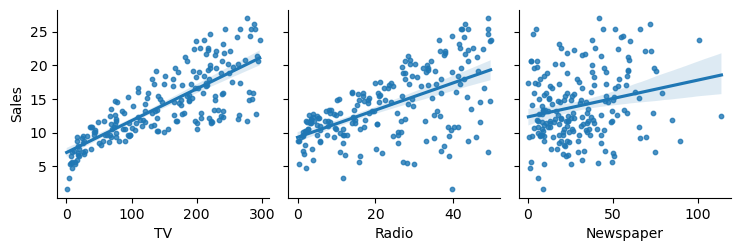

In [12]:
tv_sales_correlation = data['TV'].corr(data['Sales'])
radio_sales_correlation = data['Radio'].corr(data['Sales'])
newspaper_sales_correlation = data['Newspaper'].corr(data['Sales'])

print('\ncorrelation between each feature and the target:\n')

print('\ttv and sales: ', tv_sales_correlation)
print('\tradio and sales: ', radio_sales_correlation)
print('\tnewspaper and sales: ', newspaper_sales_correlation)

sns.pairplot(data = data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='reg', plot_kws=dict(scatter_kws=dict(s=10)));

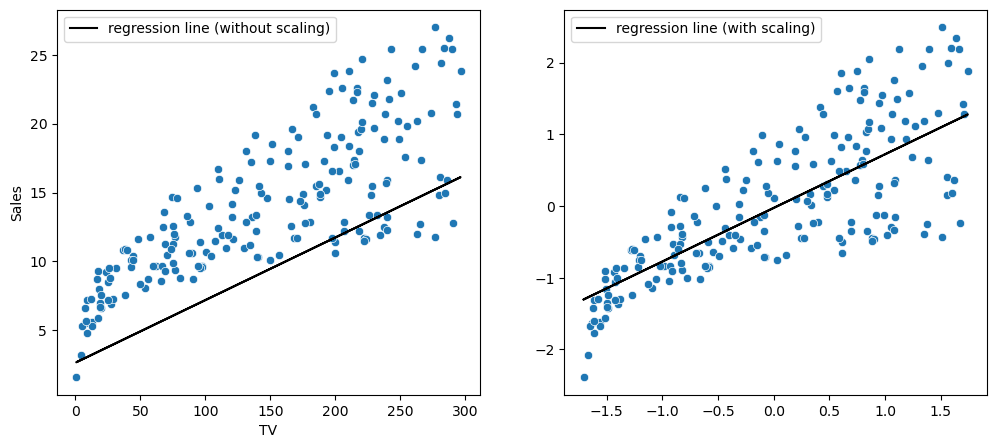

In [13]:
first_regression_line_eq = intercept_1 + coeff_1[0] * data['TV']
second_regression_line_eq = intercept_2 + coeff_2[0] * scaled_data[:, 0]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)


sns.scatterplot(x=data['TV'], y=data['Sales'], ax=ax[0])
ax[0].plot(data['TV'], first_regression_line_eq, label='regression line (without scaling)', c='k')

sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, -1], ax=ax[1])
ax[1].plot(scaled_data[:, 0], second_regression_line_eq, label='regression line (with scaling)', c='k')


ax[0].legend()
ax[1].legend();